# AI Workshop

In this lab, we will create 2 linear regression models: a simple linear regression model, and a multiple linear regression model.

## Simple Linear Regression

Simple linear regression works by looking at 1 feature vs 1 target. This is very basic, but will allow us to understand how these models work under-the-hood.

### Step 1: Setup

To start, we need to import some libraries:

In [1]:
import numpy as np				# This will be used to handle our data

from numpy.random import seed	# These 2 will be used to generate our sample data
from numpy.random import randn

import matplotlib.pyplot as plt	# This will be used to plot our results and create graphs

And initialise some variables:

In [2]:
c = 0
m = 0
# Remember these from our equation y = mx + c?

### Step 2: Create some sample data

After you've imported those, we will look at generating some sample data to work with. We need some linearly correlated data for this task, so we will create a function to generate some random points, with a general positive correlation.

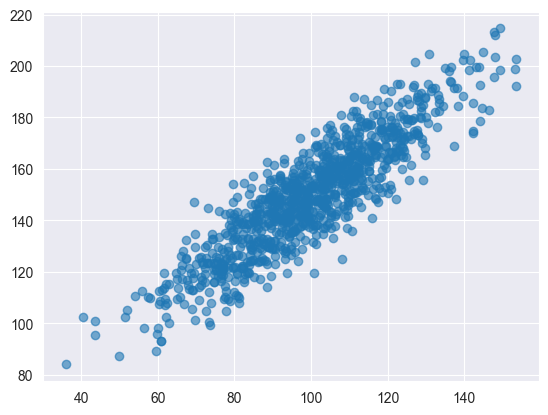

In [3]:
seed(10) # Change this value to get different test data

# Generate random x values
x = 20 * randn(1000) + 100
# Based on the x values, generate some y values
y = x + (10 * randn(1000) + 50)

# Show our test data
plt.scatter(x, y, alpha=0.6)
plt.show()

### Step 3: Calculate gradient

We are first going to find the gradient (m) of our line of best fit through all the points. This can be found using our equation:

<img width="373" height="142" alt="image" src="https://github.com/user-attachments/assets/796727a0-059b-45aa-bbed-73cc8a9da3e1" />


First, we need to find $\bar{x}$ and $\bar{y}$. Remember, this just means the average values of x and average values of y.

In [4]:
avgX = np.mean(x)
avgY = np.mean(y)

print (avgX, avgY)

99.7088672876906 149.5979519731751


Now in our equation, we have a sum on the numerator (the top of the fraction), and a sum on the denominator (the bottom of the fraction). So we will work these out here:

In [5]:
numeratorSum = 0
denominatorSum = 0

for i in range(len(x)):
    numeratorSum += (x[i] - avgX) * (y[i] - avgY)
    denominatorSum += (x[i] - avgX) ** 2

print(numeratorSum, denominatorSum)

364547.4271718969 351905.90171376464


Once we have worked out the sums on both sides of our fraction, we can divide this to find our gradient:

In [6]:
m = numeratorSum / denominatorSum

print(m)

1.0359230277087388


And see how it looks:

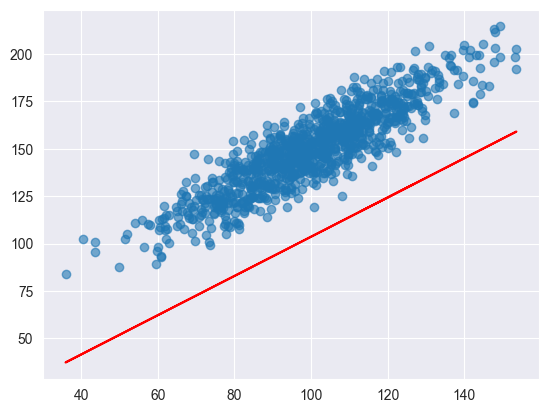

In [7]:
# Plot the line of best fit so far with the correct gradient. Line has a y intercept of 0, which will be adjusted when c is calculated

plt.scatter(x, y, alpha=0.6)
plt.plot(x, m * x + c, color='red')
plt.show()

### Step 4: Find y-intercept

We can rearrange our equation $y = mx + c$, to get $c = y - mx$. Since we are working with the line of best fit, and not individual x and y values, we will use $\bar{x}$ and $\bar{y}$:

In [8]:
c = avgY - (m * avgX)

print(c)

46.307240283101834


And see how that affects your line:

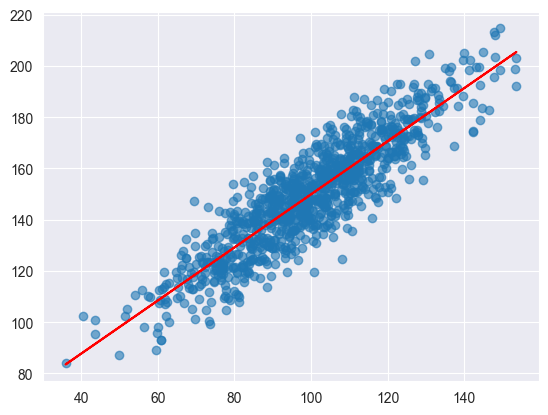

In [9]:
plt.scatter(x, y, alpha=0.6)
plt.plot(x, m * x + c, color='red')
plt.show()

## Multiple Linear Regression

Multiple linear regression is harder to visualise, as it has so many different gradients and axis. So we will use statistics to test the accuracy of our models, rather than graphs.

### Step 1: Setup

Again, we will start by importing our libraries:

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import sample

### Step 2: Get data

Instead of sample data, we will be using a real housing price dataset.
To use this dataset, we will have our code access it from your google drive. Go into your drive and create a folder called "Datasets". Add the California-Housing-Price dataset from this GitHub repo to this folder, then run the code below.

In [11]:
data = pd.read_csv('./California-House-Prices.csv')

data.dropna(inplace=True)
data.head()

y = data["median_house_value"].to_numpy()
X = data.drop("median_house_value", axis=1).to_numpy()

print(X[1])
print(y[1])

[-122.22     37.86     21.     7099.     1106.     2401.     1138.
    8.3014]
358500


### Step 3: Normalise the data

Our data currently is very large (number >1000), and varies wildly. This will mean our coefficients will need to be large and varied. This can cause us error later on if our coefficients become too large and overflow. To fix this issue before it breaks our code, we are going to normalise the data. This will take all our numbers and shrink them, so that the mean of all values is 0, and the standard deviation is 1.

In [12]:
# Normalise data
X = (X - X.mean(0)) / X.std(0)

We only do this for our features.

### Step 4: Add a column of 1's

For each row in our dataset, we are going to add a column of 1's. This is used to find our y-intercept

In [13]:
features = np.c_[np.ones((X.shape[0], 1)), X]

print(features[1])

[ 1.         -1.32232256  1.04235526 -0.60621017  2.0421302   1.34827594
  0.86133924  1.67037262  2.33263161]


### Step 5: Initialise hyperparameters

Hyperparameters control how the model creates its predictions. Each model will have its own hyperparameters. In our model, we can tweak the number of epochs and the learning rate (alpha or $\alpha$)

In [14]:
# Step 3: Initialise parameters
coefficients = np.zeros(features.shape[1])
alpha = 0.01
epochs = 1000
numOfRows = len(y)

print(coefficients)
print(alpha)
print(epochs)
print(numOfRows)

[0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.01
1000
20433


### Step 6: Calculate gradient

We can now start to compute our gradient, and for each epoch we will slowly shift the line of best fit using our gradient descent function:

<img width="689" height="246" alt="image" src="https://github.com/user-attachments/assets/1b8cb82d-12ad-4c4b-b922-b5692161e490" />

In [15]:
for epoch in range(epochs):
    predictions = features.dot(coefficients)
    gradient = (1/numOfRows) * features.T.dot(predictions - y)
    coefficients -= alpha * gradient

    if (epoch % 100 == 0 or epoch == 0):
        cost = (1/(2*numOfRows)) * np.sum((predictions - y)**2)
        print(f"Epoch {epoch}, Cost: {cost:.4f}")

print("\nLearned coefficients:")
for i, coef in enumerate(coefficients):
    print(f"b{i}: {coef:.4f}")

Epoch 0, Cost: 28058813258.9674
Epoch 100, Cost: 6423143894.9677
Epoch 200, Cost: 3415891716.6088
Epoch 300, Cost: 2935810521.9377
Epoch 400, Cost: 2812114569.3480
Epoch 500, Cost: 2746928344.2382
Epoch 600, Cost: 2697554198.0898
Epoch 700, Cost: 2656723271.8184
Epoch 800, Cost: 2622351769.5012
Epoch 900, Cost: 2593280461.1149

Learned coefficients:
b0: 206855.4826
b1: -43359.4653
b2: -48633.5360
b3: 20382.5868
b4: -4813.1815
b5: 22149.3798
b6: -32437.1463
b7: 22518.8908
b8: 78364.0354


## Step 7: Use your model

Thats it! You have created and trained your AI model. Now all that is left is to test it.
As a warning, this model will **not** be accurate. But all that matters is you've made it yourself.

In [16]:
predictions = features.dot(coefficients)

mse = np.mean((y - predictions)**2)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Squared Error (MSE): 5137268670.8501
Root Mean Squared Error (RMSE): 71674.7422


#### Visualisation

At the start I said it will be hard to create graphs and visuals. This is true. But we can make a graph to show how accurate the model was.
The following graph will show all the predictions your model made, versus thier actual values:

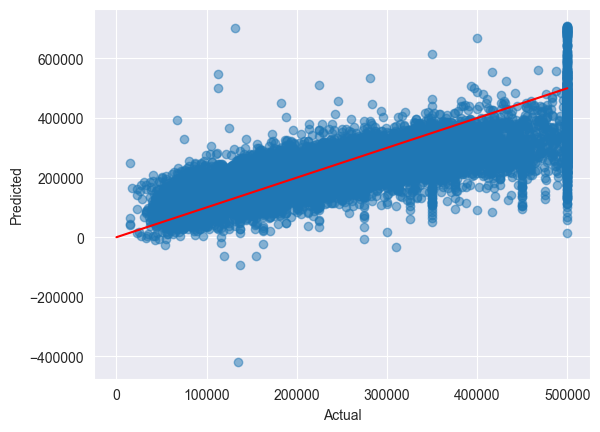

In [17]:
plt.scatter(y, predictions, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot([0,500000], [0,500000], color='red') # Add the y=x line
plt.show()

#### Statistics

We can also view individual predictions:

In [18]:
for i in range(10):
   print(f"Prediction: {predictions[i]}\nActual: {y[i]}\nDifference: {predictions[i] - y[i]}\n\n")

Prediction: 409005.12584214273
Actual: 452600
Difference: -43594.874157857266


Prediction: 413645.4387939712
Actual: 358500
Difference: 55145.4387939712


Prediction: 383589.68798981654
Actual: 352100
Difference: 31489.687989816535


Prediction: 320688.85815180955
Actual: 341300
Difference: -20611.141848190455


Prediction: 250291.3531474657
Actual: 342200
Difference: -91908.6468525343


Prediction: 256656.48342507263
Actual: 269700
Difference: -13043.516574927373


Prediction: 251663.45756926367
Actual: 299200
Difference: -47536.54243073633


Prediction: 244605.3850195435
Actual: 241400
Difference: 3205.3850195434934


Prediction: 181326.7900788531
Actual: 226700
Difference: -45373.20992114689


Prediction: 260913.04273370776
Actual: 261100
Difference: -186.95726629224373




Or look at how close our predictions are to thier actual values:

In [19]:
def test(y_test, y_pred):

  answers = {
      0.0: 0,
      0.1: 0,
      0.2: 0,
      0.3: 0,
      0.4: 0,
      0.5: 0,
      0.6: 0,
      0.7: 0,
      0.8: 0,
      0.9: 0,
      1.0: 0
  }

  for i in range(len(y_test)):
    difference = abs(y_pred[i] - y_test[i])
    differencePercent = abs(y_pred[i] - y_test[i])/y_test[i]
    category = round(differencePercent, 1)

    if (category > 1):
      answers[1.0] += 1
    else:
      answers[category] += 1

  print(answers)

  for i in range(11):
    print(f"{i/10}%: {round((answers[i/10]/len(y_test)) * 100, 2)}%, {answers[i/10]}")

test(y, predictions)

{0.0: 2539, 0.1: 4640, 0.2: 3879, 0.3: 2898, 0.4: 2028, 0.5: 1347, 0.6: 814, 0.7: 619, 0.8: 455, 0.9: 337, 1.0: 877}
0.0%: 12.43%, 2539
0.1%: 22.71%, 4640
0.2%: 18.98%, 3879
0.3%: 14.18%, 2898
0.4%: 9.93%, 2028
0.5%: 6.59%, 1347
0.6%: 3.98%, 814
0.7%: 3.03%, 619
0.8%: 2.23%, 455
0.9%: 1.65%, 337
1.0%: 4.29%, 877


LabSheet by [Iain Simpson](https://github.com/IainSimpsonCode)